In [1]:
# Importing the requir libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the Dataset

In [2]:
data = pd.read_excel(r"C:\Users\Vikas\OneDrive\Desktop\CipherByte\unemp\Unemployment in India.xlsx")

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


### Datatypes

In [5]:
data.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

### Data Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


### Getting 5 point Summery

In [7]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### Columns Name

In [8]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Data Cleaning

**Looking for Duplicates**

In [9]:
data.duplicated().sum()

13

**Droping Duplicates**

In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

**Looking for the missing value**

In [12]:
data.isnull().sum()

Region                                     1
Date                                       1
Frequency                                  1
Estimated Unemployment Rate (%)            1
Estimated Employed                         1
Estimated Labour Participation Rate (%)    1
Area                                       1
dtype: int64

**Displaying missing data**

In [13]:
data[data.isna().any(axis = 1)]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Droping those rows who contain all NaN value**

In [14]:
data = data.dropna(how = 'all', axis = 0)

**Filling the all numerical column missing value with his mean**

In [15]:
for num in data.columns[3:-1]:
    data[num]=data[num].fillna(data[num].mean())

In [16]:
data.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

### Univariate Analysis

**Distribution of Estimated Unemployment Rate (%)**

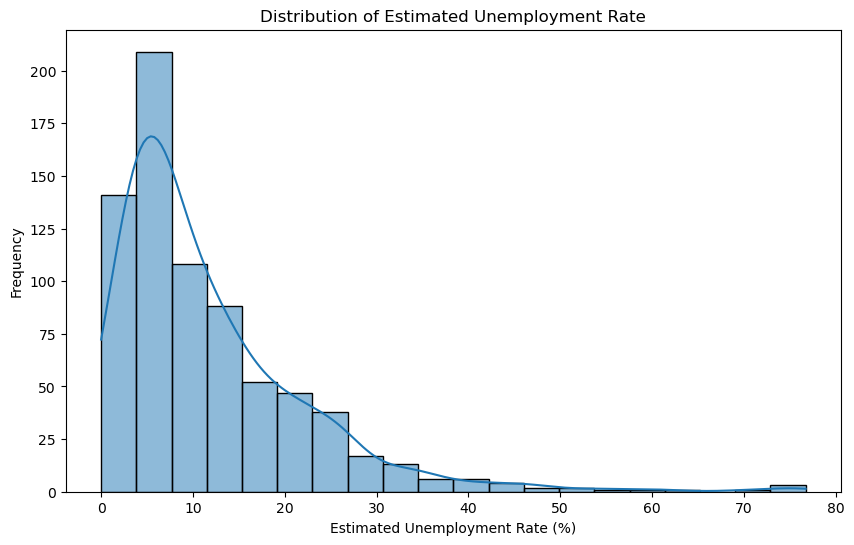

In [17]:
plt.figure(figsize = (10,6))
sns.histplot(data['Estimated Unemployment Rate (%)'], bins = 20, kde = True)
plt.title('Distribution of Estimated Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

**Distribution of Estimated Employed**

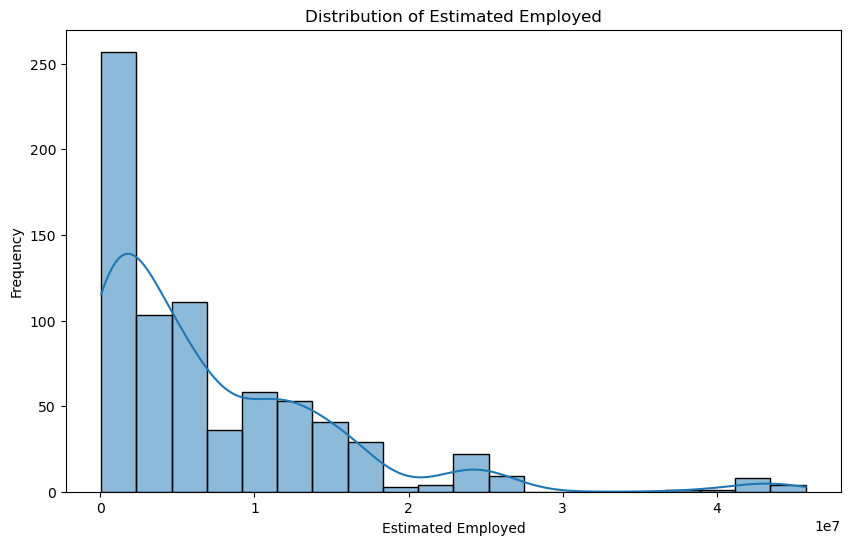

In [18]:
plt.figure(figsize = (10,6))
sns.histplot(data['Estimated Employed'], bins = 20, kde = True)
plt.title('Distribution of Estimated Employed')
plt.ylabel('Frequency')
plt.show()

**Distribution Estimated Labour Participation Rate (%)**

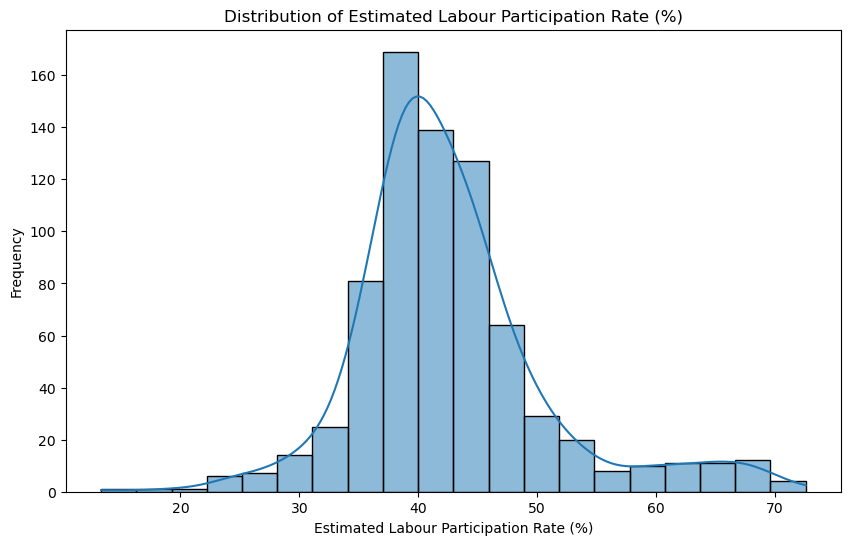

In [19]:
plt.figure(figsize = (10,6))
sns.histplot(data['Estimated Labour Participation Rate (%)'], kde = True, bins = 20)
plt.title('Distribution of Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

**Inspecting Region column**

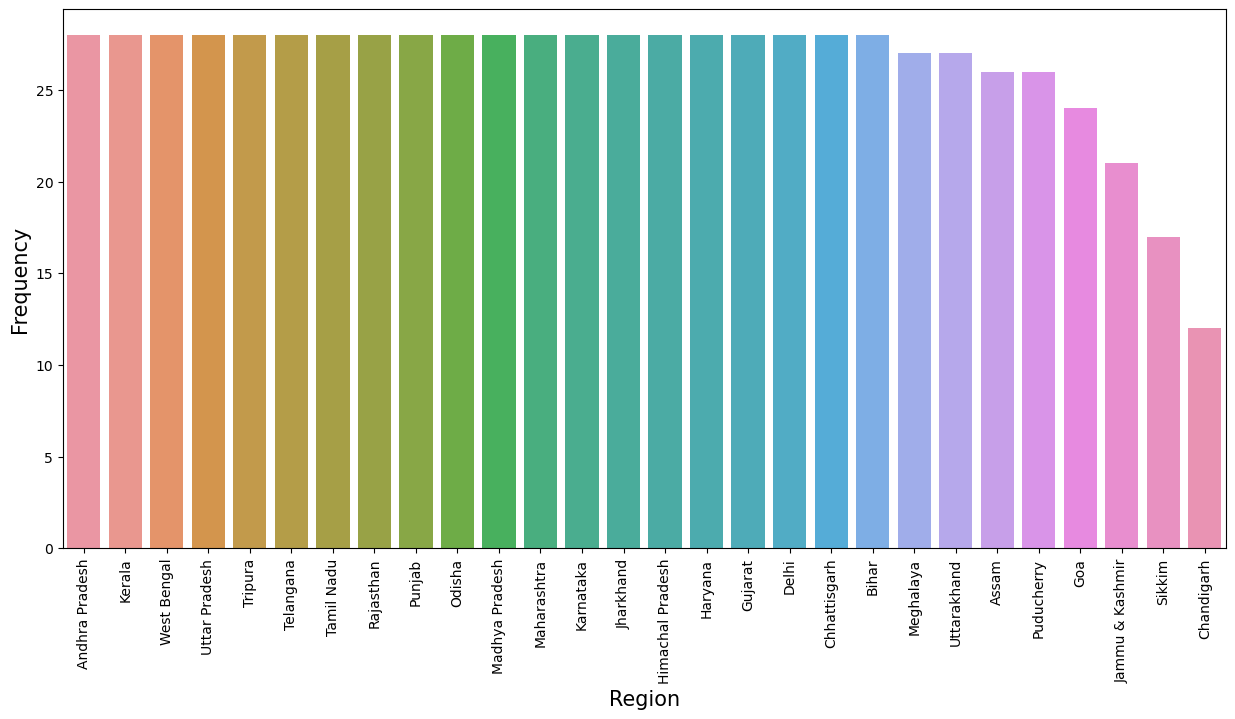

In [20]:
plt.figure(figsize = (15,7))
sns.countplot(x = data['Region'], order=data['Region'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Region',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.show()

**Inspection of Area column**

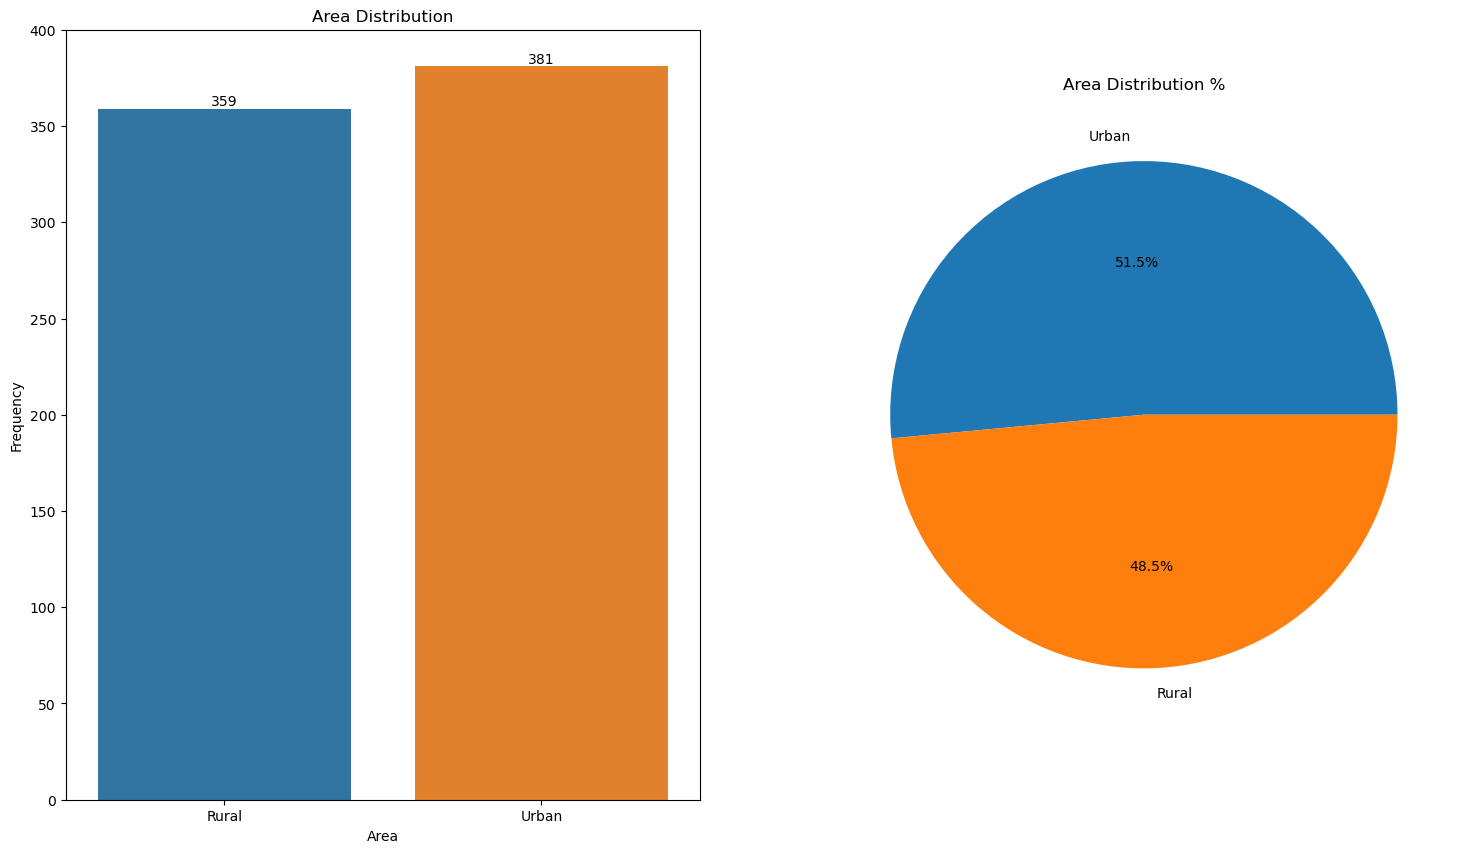

In [21]:
plt.figure(figsize = (18,10))
plt.subplot(1,2,1)

ax = sns.countplot(data['Area'])
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Area Distribution')
plt.ylabel('Frequency')
    
plt.subplot(1,2,2)
plt.pie(data['Area'].value_counts(),labels=data['Area'].value_counts().index, autopct='%.1f%%')
plt.title('Area Distribution %')
plt.show()

**Outlier Detection using boxplot**

In [22]:
data.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


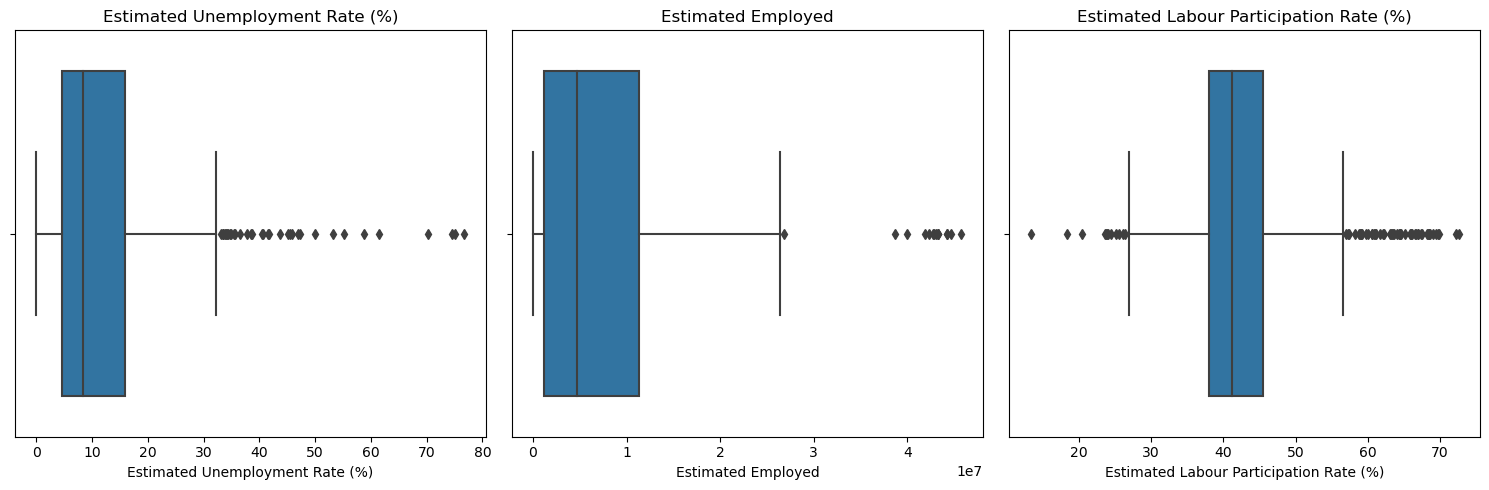

In [23]:
plt.figure(figsize=(15,5))
for i, cols in enumerate(data.columns[3:-1]):
    plt.subplot(1,3,i+1)
    sns.boxplot(x = data[cols])
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()

**Removing Outlier using IQR Method**

In [24]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Remove outliers from Column1
data['Estimated Unemployment Rate (%)'] = remove_outliers(data['Estimated Unemployment Rate (%)'])

# Remove outliers from Column2
data['Estimated Labour Participation Rate (%)'] = remove_outliers(data['Estimated Labour Participation Rate (%)'])

# Remove outliers from Column3
data['Estimated Employed'] = remove_outliers(data['Estimated Employed'])

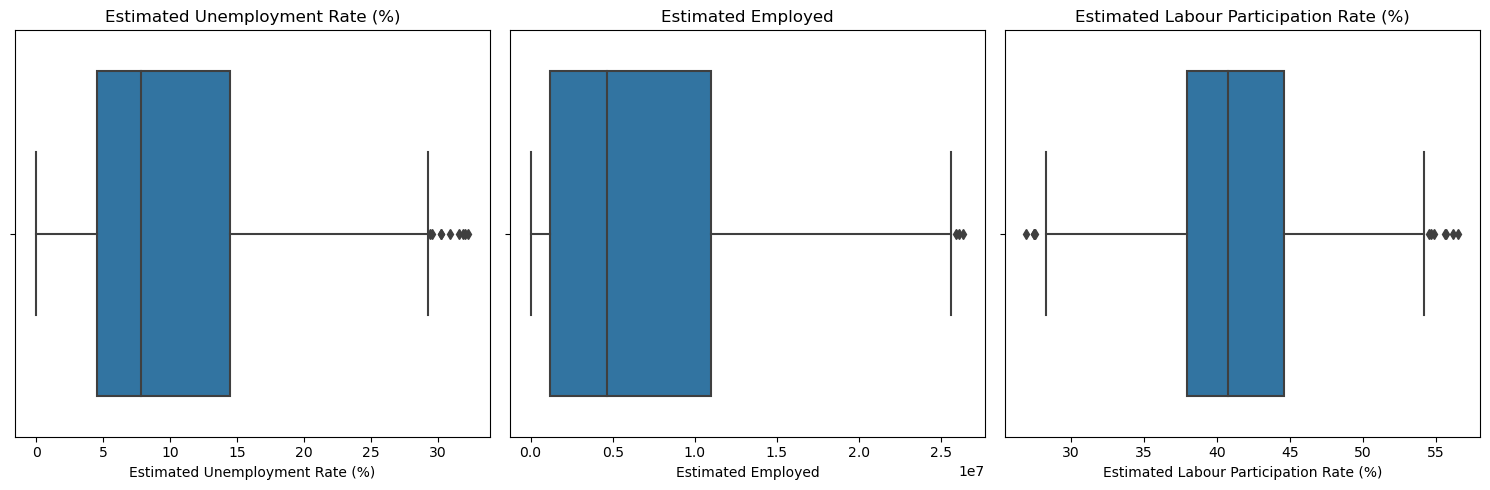

In [25]:
plt.figure(figsize=(15,5))
for i, cols in enumerate(data.columns[3:-1]):
    plt.subplot(1,3,i+1)
    sns.boxplot(x = data[cols])
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()

## Bivariate Analysis

**Correlation Matrix(heatmap)**

<AxesSubplot:>

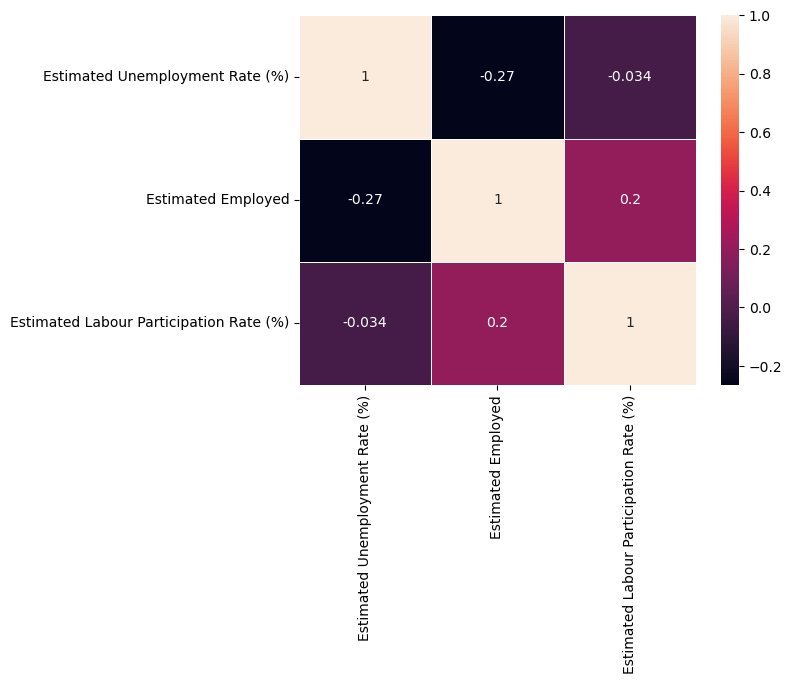

In [26]:
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=0.5, linecolor='white')

**Regression analysis between Estimated Employed and Estimated Unemployment Rate (%)**

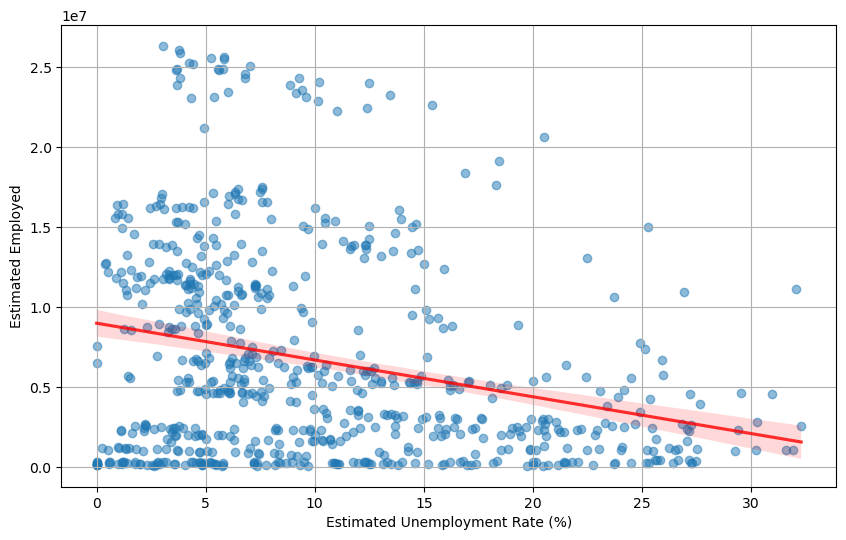

In [27]:
plt.figure(figsize = (10,6))
sns.regplot(x = data['Estimated Unemployment Rate (%)'], y = data['Estimated Employed'], 
            scatter_kws={'alpha':0.5}, line_kws={'alpha':0.8,'color':'red'})
plt.grid()
plt.show()

**Regression Analysis between Estimated Employed and Estimated Labour Participation Rate (%)**

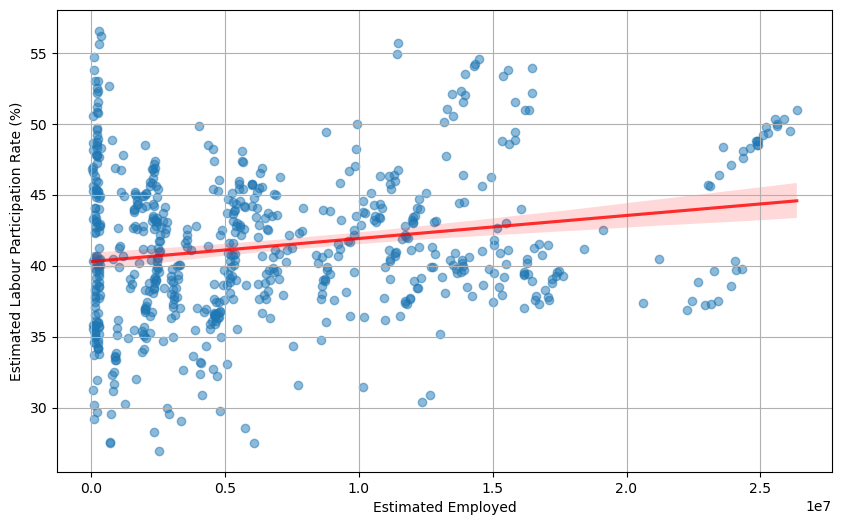

In [28]:
plt.figure(figsize = (10,6))
sns.regplot(y = data['Estimated Labour Participation Rate (%)'], x = data['Estimated Employed'], 
            scatter_kws={'alpha':0.5}, line_kws={'alpha':0.8,'color':'red'})
plt.grid()
plt.show()

**Regression Analysis of Estimated Unemployment Rate (%) and Estimated Labour Participation Rate (%)**

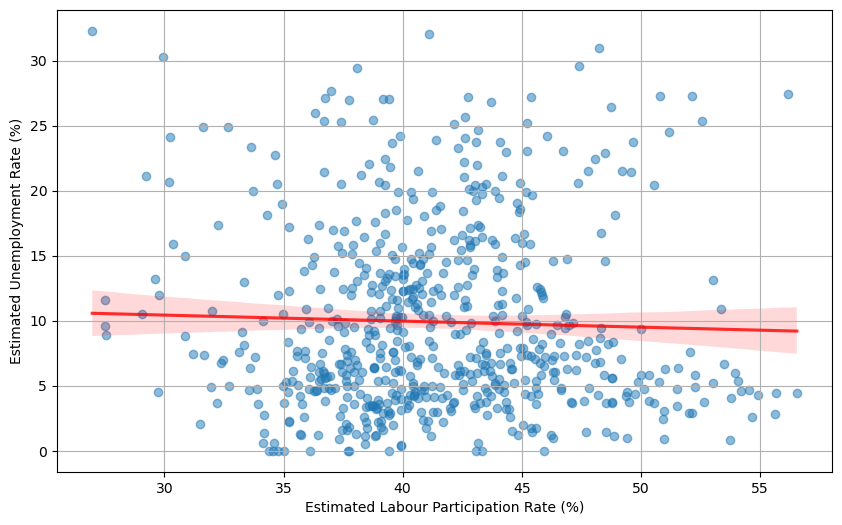

In [29]:
plt.figure(figsize = (10,6))
sns.regplot(x = data['Estimated Labour Participation Rate (%)'], y = data['Estimated Unemployment Rate (%)'], 
            scatter_kws={'alpha':0.5}, line_kws={'alpha':0.8,'color':'red'})
plt.grid()
plt.show()

### Pairwise bivariate distribution

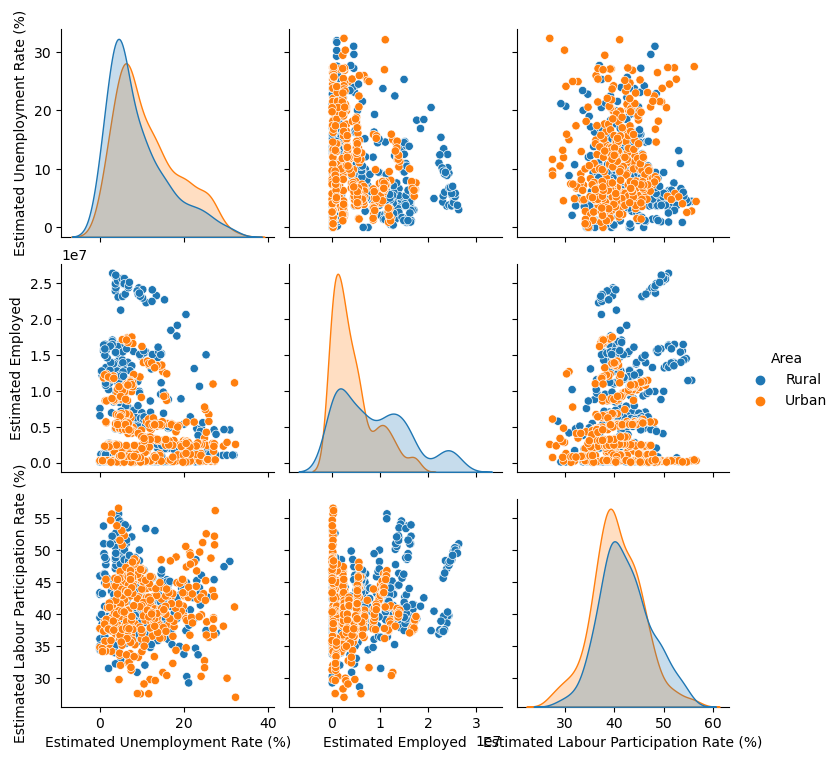

In [30]:
sns.pairplot(data,diag_kind='kde',hue='Area')

plt.show()

### Bivariate analysis between Region column and Area column

In [31]:
cross = pd.crosstab(data['Region'], data['Area'])

**Visualization of the cross tabulation using stacked bar**

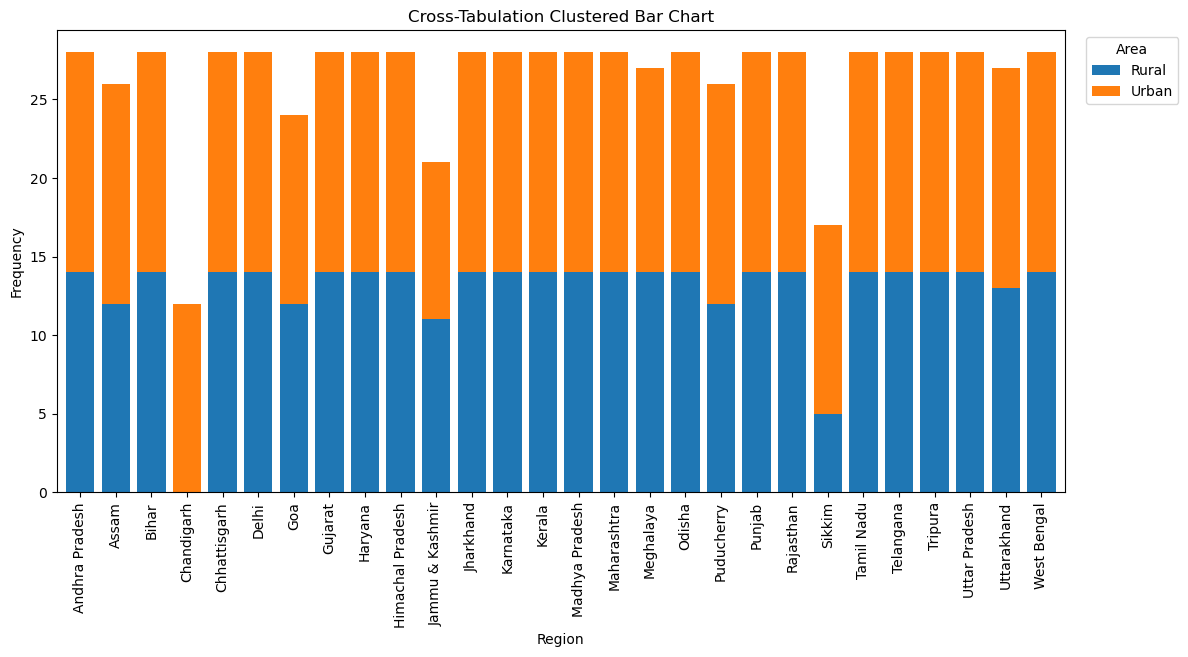

In [32]:
cross.plot(kind = 'bar', stacked = True,figsize=(13, 6),width=0.8)
plt.ylabel('Frequency')
plt.title('Cross-Tabulation Clustered Bar Chart')
plt.legend(title='Area', loc='upper right', bbox_to_anchor=(1.12, 1.0))
plt.show()

### Statistical Analysis

**Avarage Unemployment rate based on Region wise in India**

In [33]:
region_mean = data.groupby(['Region'])['Estimated Unemployment Rate (%)'].mean().sort_values(ascending = False)
region_mean

Region
Tripura             25.592500
Haryana             23.442609
Himachal Pradesh    17.375185
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Delhi               15.410741
Jharkhand           14.496250
Bihar               14.196667
Rajasthan           13.262963
Uttar Pradesh       12.551429
Punjab              10.973333
Kerala              10.123929
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Maharashtra          7.557500
Andhra Pradesh       7.477143
Sikkim               7.249412
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Madhya Pradesh       6.181111
Karnataka            5.694815
Odisha               5.657857
Telangana            5.618462
Tamil Nadu           4.899600
Meghalaya            4.798889
Puducherry           1.710435
Name: Estimated Unemployment Rate (%), dtype: float64

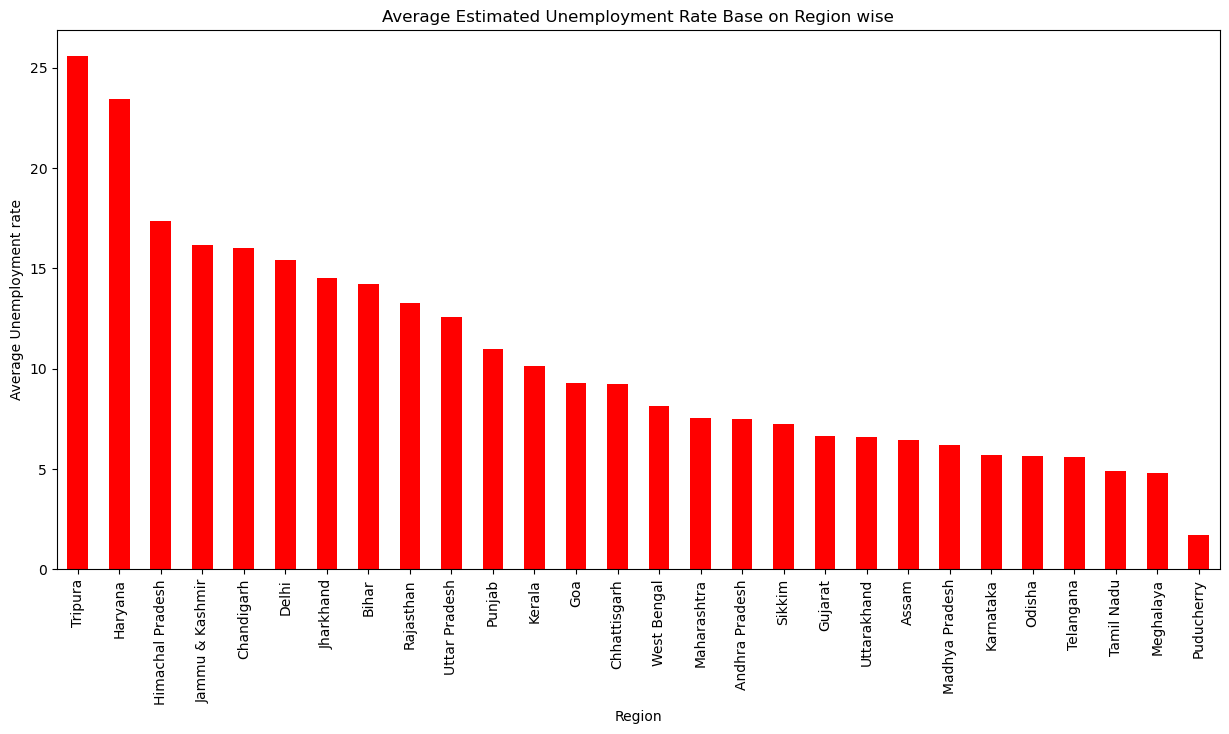

In [34]:
plt.figure(figsize = (15,7))
region_mean.plot(kind = 'bar', color = 'red',)
plt.title('Average Estimated Unemployment Rate Base on Region wise')
plt.ylabel('Average Unemployment rate')
plt.show()

**Average of Estimated Employed base on Region wise in India**

In [35]:
est_emp_region_mean = data.groupby(['Region'])['Estimated Employed'].mean().sort_values(ascending = False)
est_emp_region_mean

Region
Maharashtra         1.973667e+07
West Bengal         1.719854e+07
Uttar Pradesh       1.332281e+07
Bihar               1.236619e+07
Tamil Nadu          1.226955e+07
Gujarat             1.140201e+07
Madhya Pradesh      1.111548e+07
Karnataka           1.066712e+07
Rajasthan           1.004106e+07
Andhra Pradesh      8.154093e+06
Telangana           7.939663e+06
Odisha              6.545747e+06
Assam               5.354772e+06
Punjab              4.539362e+06
Jharkhand           4.469240e+06
Kerala              4.425900e+06
Chhattisgarh        4.303499e+06
Haryana             3.557072e+06
Delhi               2.627513e+06
Jammu & Kashmir     1.799932e+06
Uttarakhand         1.390228e+06
Himachal Pradesh    1.059824e+06
Tripura             7.170026e+05
Meghalaya           6.897368e+05
Chandigarh          3.168312e+05
Goa                 2.263083e+05
Puducherry          2.122781e+05
Sikkim              1.068807e+05
Name: Estimated Employed, dtype: float64

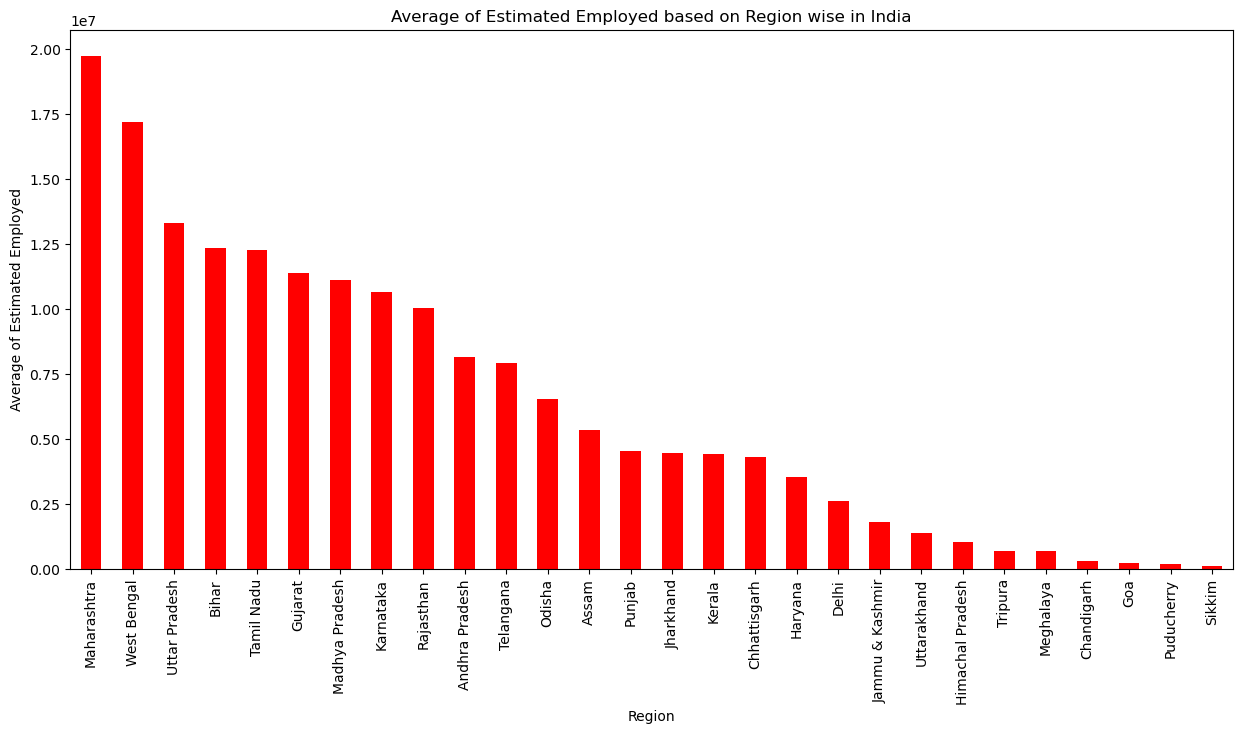

In [36]:
plt.figure(figsize = (15,7))
est_emp_region_mean.plot(kind = 'bar', color = 'red')
plt.title('Average of Estimated Employed based on Region wise in India')
plt.ylabel('Average of Estimated Employed')
plt.show()

**Average of Estimated Labour Participation Rate (%) based on Region wise**

In [37]:
avg_est_lab_prt_rate = data.groupby(['Region'])['Estimated Labour Participation Rate (%)'].mean().sort_values(ascending = True)
avg_est_lab_prt_rate

Region
Uttarakhand         34.061923
Kerala              36.248462
Bihar               38.153929
Madhya Pradesh      38.821429
Puducherry          38.992692
Goa                 39.249583
Chandigarh          39.336667
Andhra Pradesh      39.375714
Uttar Pradesh       39.432500
Delhi               39.497778
Odisha              39.971154
Rajasthan           39.973214
Jammu & Kashmir     41.030952
Karnataka           41.345357
Jharkhand           41.670714
Punjab              41.774815
Tamil Nadu          42.095385
Maharashtra         42.303214
Haryana             42.737143
Telangana           43.182667
Chhattisgarh        43.505185
Assam               44.367600
West Bengal         45.417500
Himachal Pradesh    45.975769
Sikkim              46.070000
Gujarat             46.101071
Meghalaya           49.590000
Tripura             50.332000
Name: Estimated Labour Participation Rate (%), dtype: float64

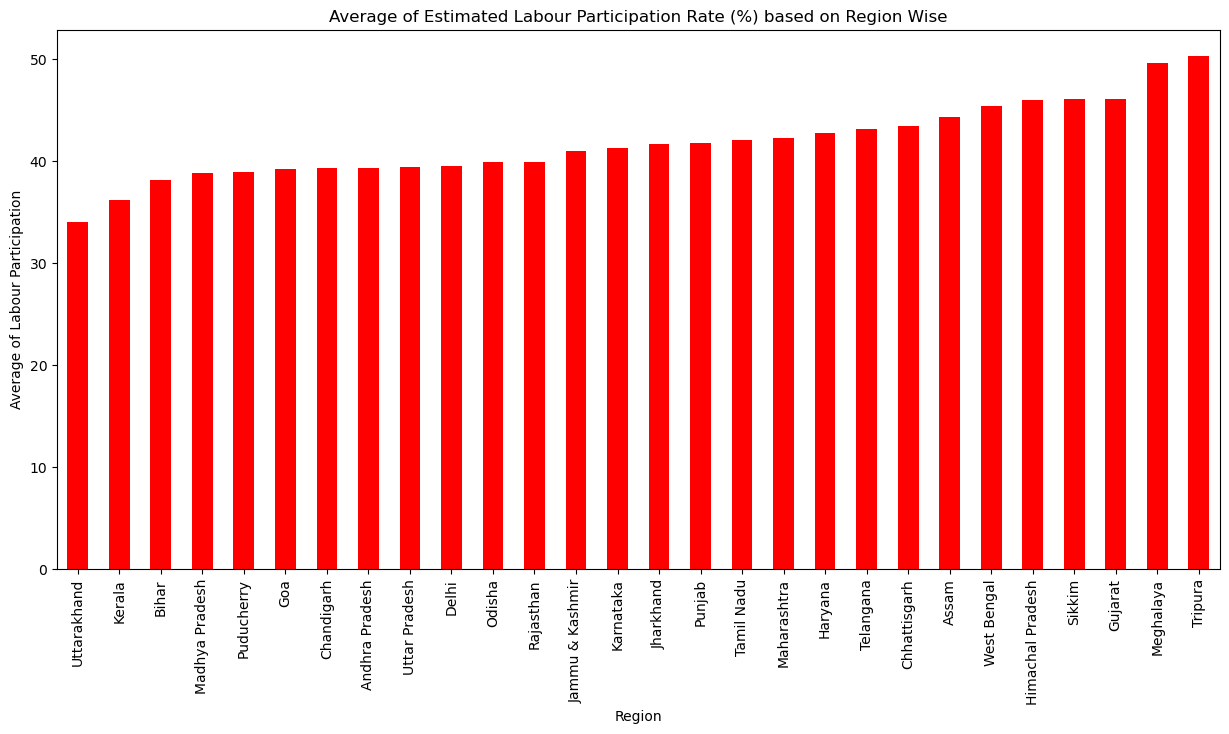

In [38]:
plt.figure(figsize = (15,7))
avg_est_lab_prt_rate.plot(kind = 'bar', color = 'red')
plt.title('Average of Estimated Labour Participation Rate (%) based on Region Wise')
plt.ylabel('Average of Labour Participation')
plt.show()

**Average of unemployment Rate based on type of Area in India**

In [39]:
area_unemp_avg = data.groupby(['Area'])['Estimated Unemployment Rate (%)'].mean().sort_values(ascending = True)
area_unemp_avg

Area
Rural     8.951275
Urban    11.274611
Name: Estimated Unemployment Rate (%), dtype: float64

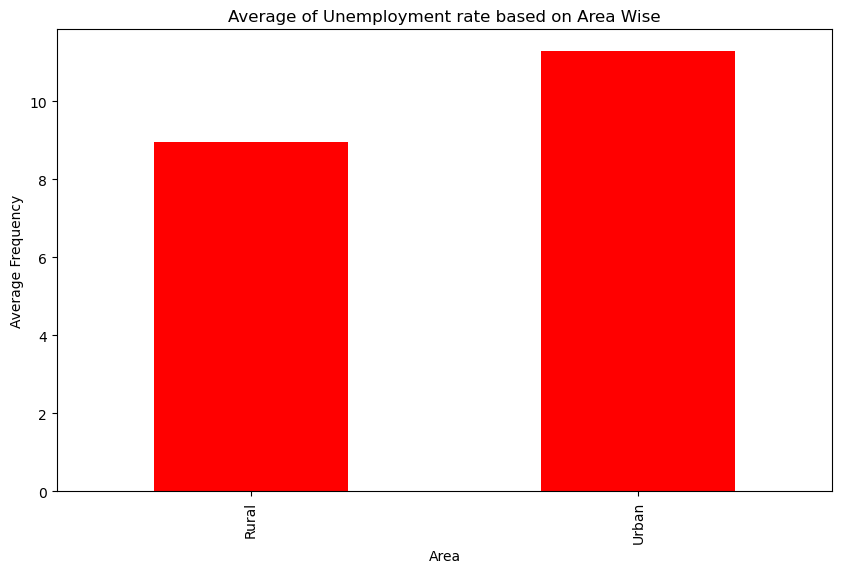

In [40]:
plt.figure(figsize = (10,6))
area_unemp_avg.plot(kind = 'bar', color = 'red')
plt.title('Average of Unemployment rate based on Area Wise')
plt.ylabel('Average Frequency')
plt.show()

**Average of Estimated Employed based on Area in India**

In [41]:
area_est_emp_avg = data.groupby(['Area'])['Estimated Employed'].mean().sort_values(ascending = True)
area_est_emp_avg

Area
Urban    4.388626e+06
Rural    8.814717e+06
Name: Estimated Employed, dtype: float64

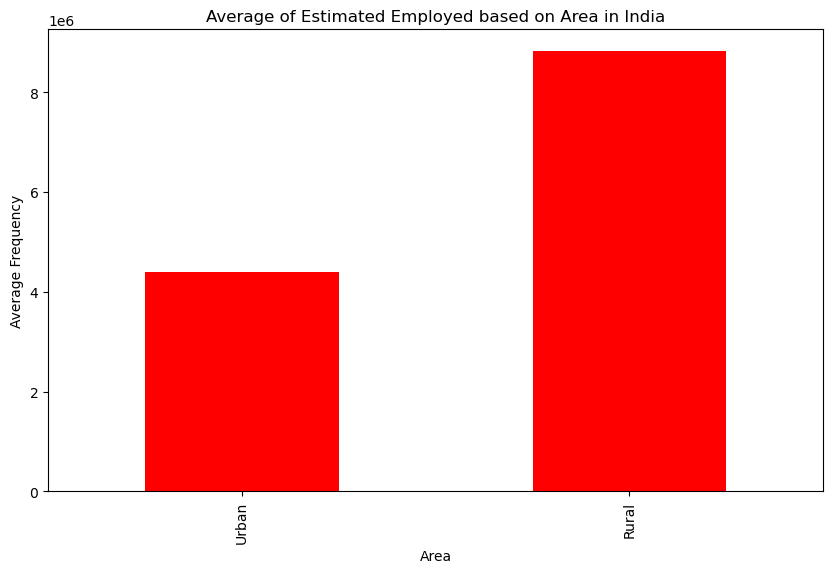

In [42]:
plt.figure(figsize = (10,6))
area_est_emp_avg.plot(kind = 'bar', color = 'red')
plt.title('Average of Estimated Employed based on Area in India')
plt.ylabel('Average Frequency')
plt.show()

**Average of Estimated Labour Participation Rate (%) based on Area**

In [43]:
area_Lab_part_avg = data.groupby(['Area'])['Estimated Labour Participation Rate (%)'].mean().sort_values(ascending = True)
area_Lab_part_avg

Area
Urban    40.575806
Rural    42.252713
Name: Estimated Labour Participation Rate (%), dtype: float64

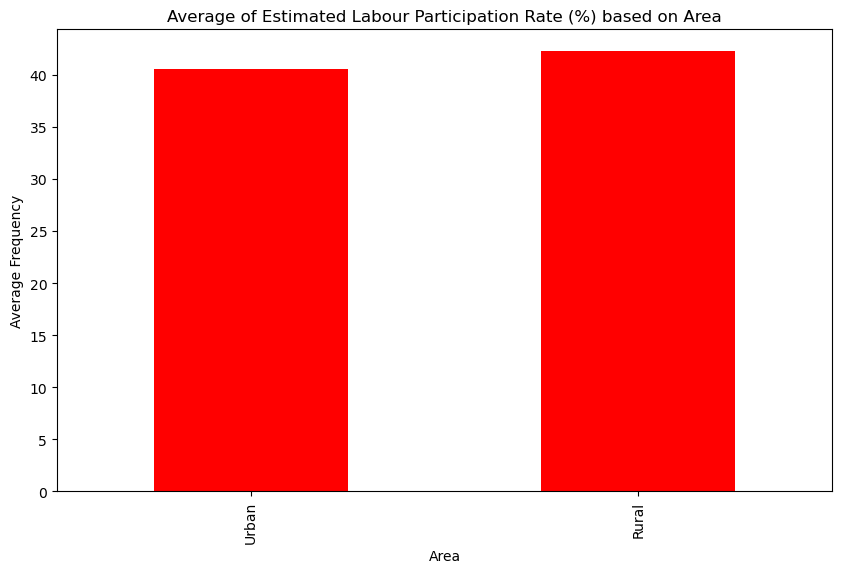

In [44]:
plt.figure(figsize = (10,6))
area_Lab_part_avg.plot(kind = 'bar', color = 'red')
plt.title('Average of Estimated Labour Participation Rate (%) based on Area')
plt.ylabel('Average Frequency')
plt.show()

**Average unemployment rate based on Region and Area of india**

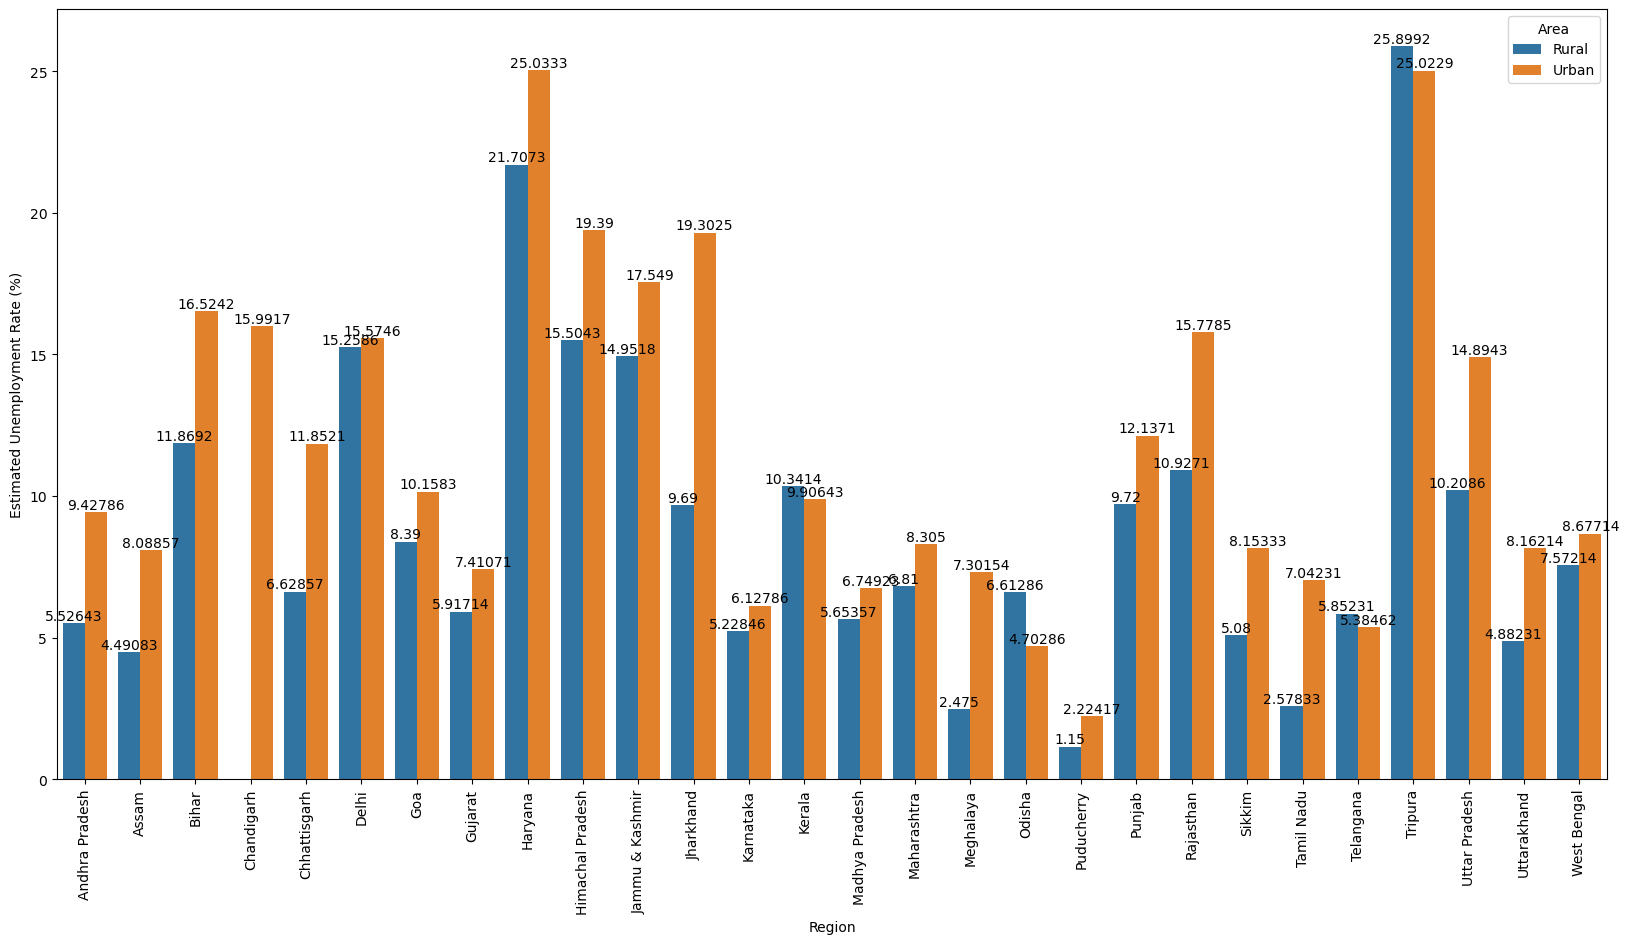

In [45]:
average = data.groupby(['Region', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', hue='Area', data=average)
for cols in ax.containers:
    ax.bar_label(cols)
plt.xticks(rotation=90)
plt.show()

In [46]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [47]:
data['Date'].dtypes

dtype('O')

**Converting Date datatype from object to datetime**

In [48]:
data['Date'] = pd.to_datetime(data['Date'])

**Extracting Year & Month from Date column**

In [49]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [50]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


**We need convert month into word for better analysis**

In [51]:
import calendar
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In [52]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,Sep


# Month wise visualization

**Month wise Unemployment rate**

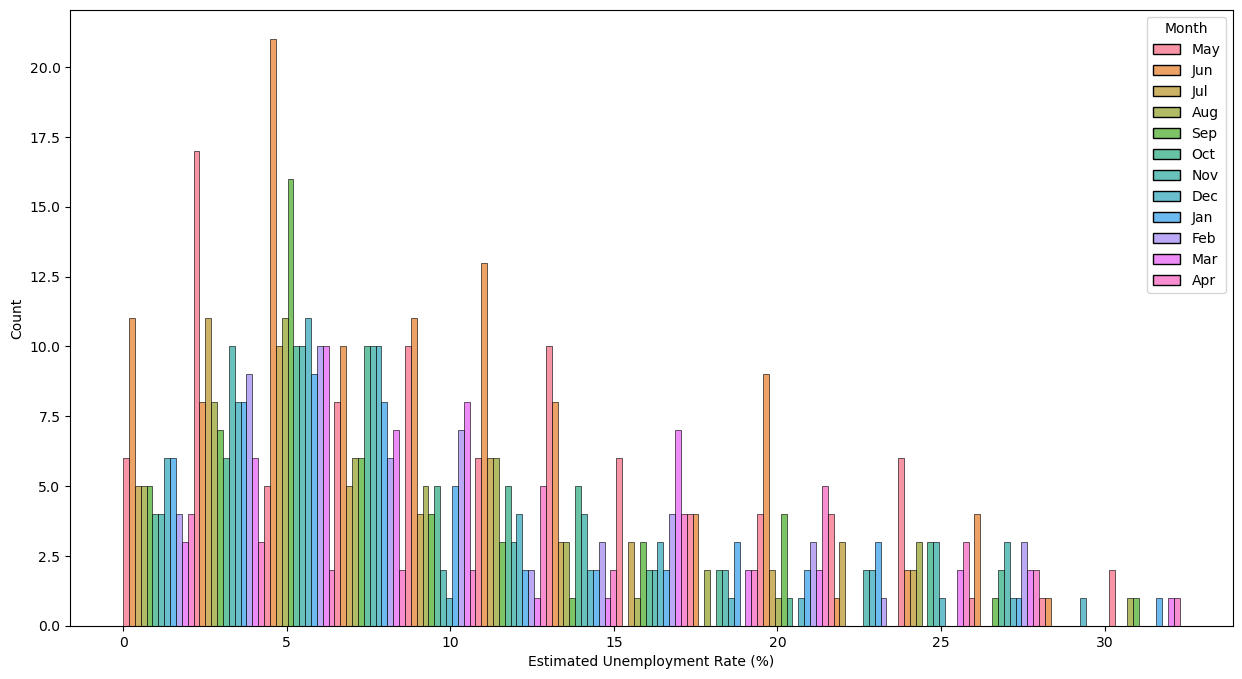

In [53]:
plt.figure(figsize = (15,8))
sns.histplot(x = 'Estimated Unemployment Rate (%)',hue = 'Month', data = data, multiple='dodge')
plt.show()

**Month wise Estimated Employed**

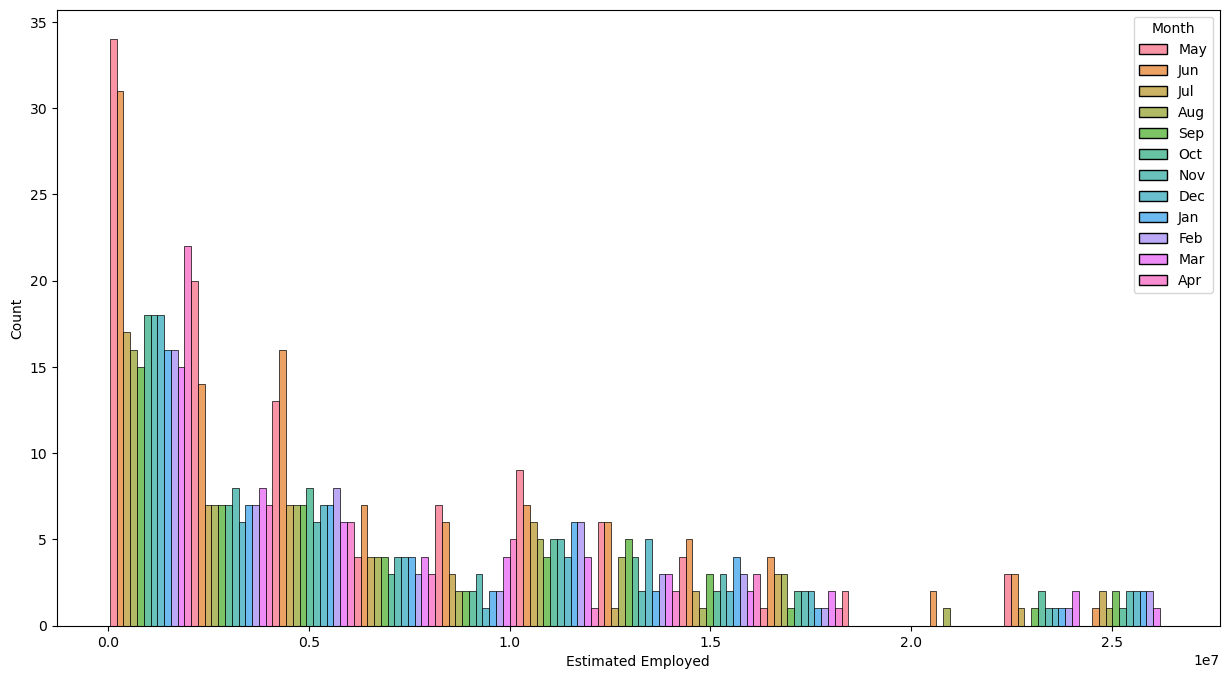

In [54]:
plt.figure(figsize = (15,8))
sns.histplot(x = 'Estimated Employed', hue = 'Month', data=data, multiple='dodge')
plt.show()

**Month wise Estimated Labour Participation Rate (%)**

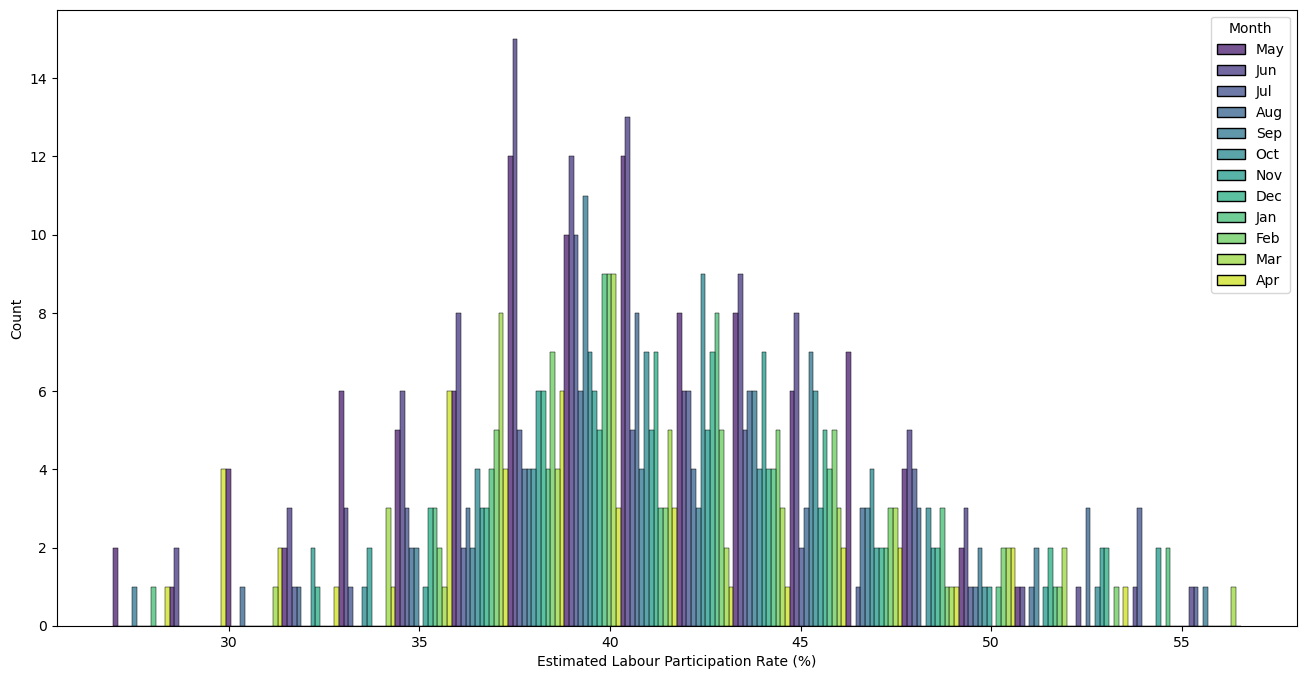

In [55]:
plt.figure(figsize = (16,8))
sns.histplot(x = 'Estimated Labour Participation Rate (%)', hue = 'Month', data=data, multiple='dodge', palette='viridis')
plt.show()

# Year wise Visualization

**Year wise Unemployment rate**

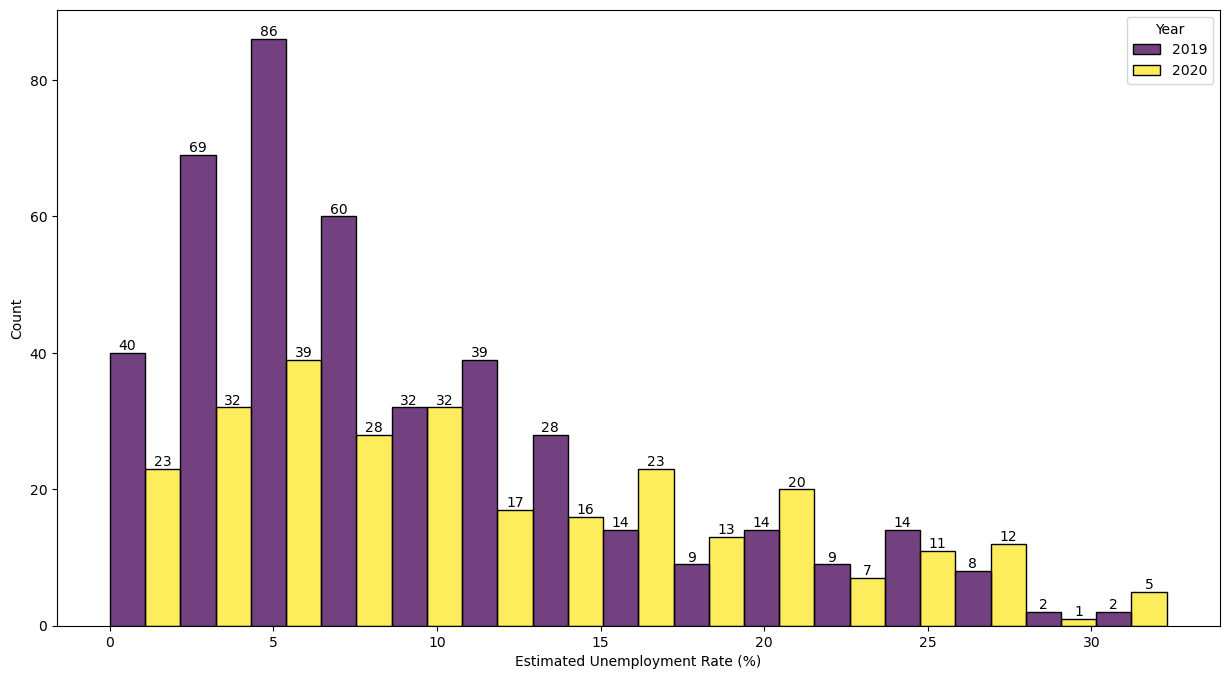

In [56]:
plt.figure(figsize = (15,8))
ax = sns.histplot(x = 'Estimated Unemployment Rate (%)', hue = 'Year', data = data, multiple='dodge', palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**Year wise Estimated employed**

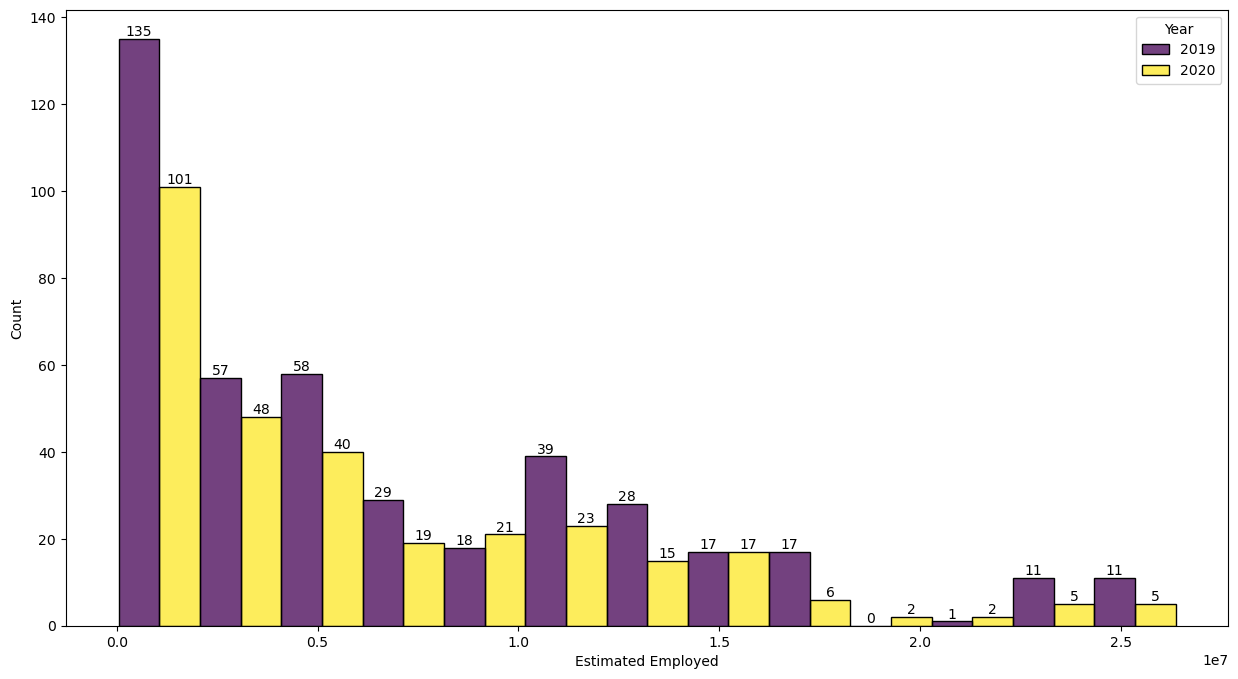

In [57]:
plt.figure(figsize = (15,8))
ax = sns.histplot(x = 'Estimated Employed', hue = 'Year', data = data, multiple='dodge',palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**Year wise Estimated Labour Participation Rate (%)**

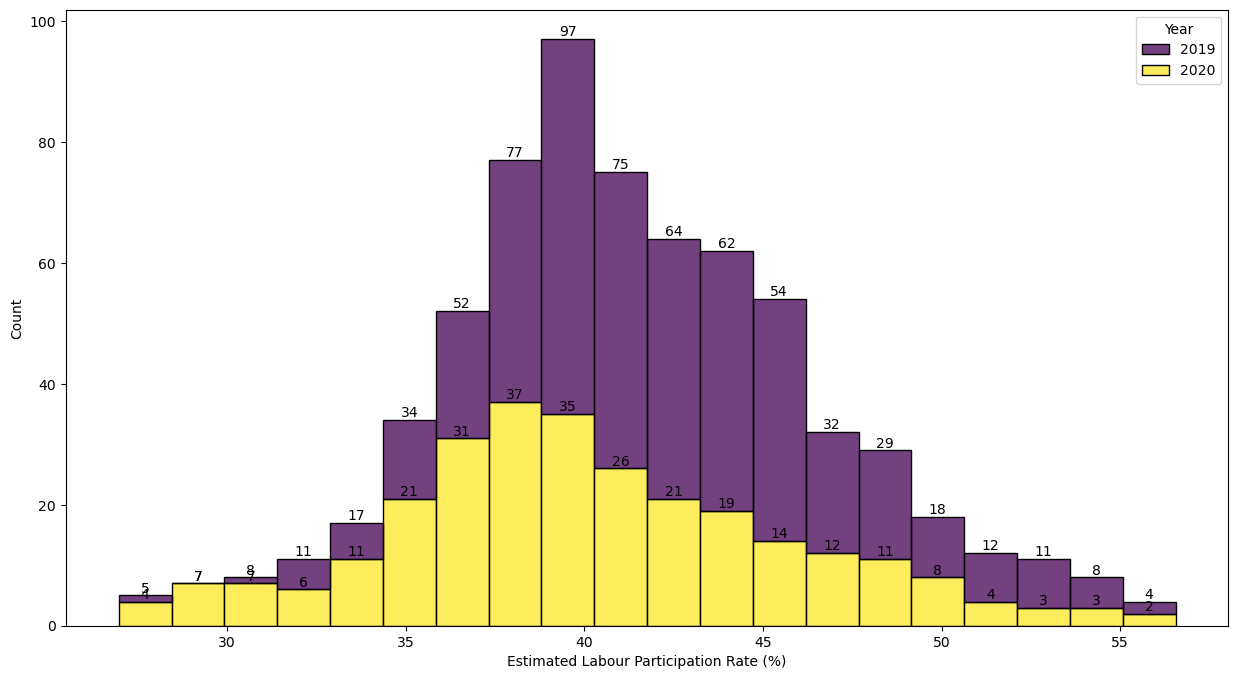

In [58]:
plt.figure(figsize = (15,8))
ax = sns.histplot(x = 'Estimated Labour Participation Rate (%)', hue = 'Year', data = data, multiple = 'stack',palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**Month wise Average Unemployment rate**

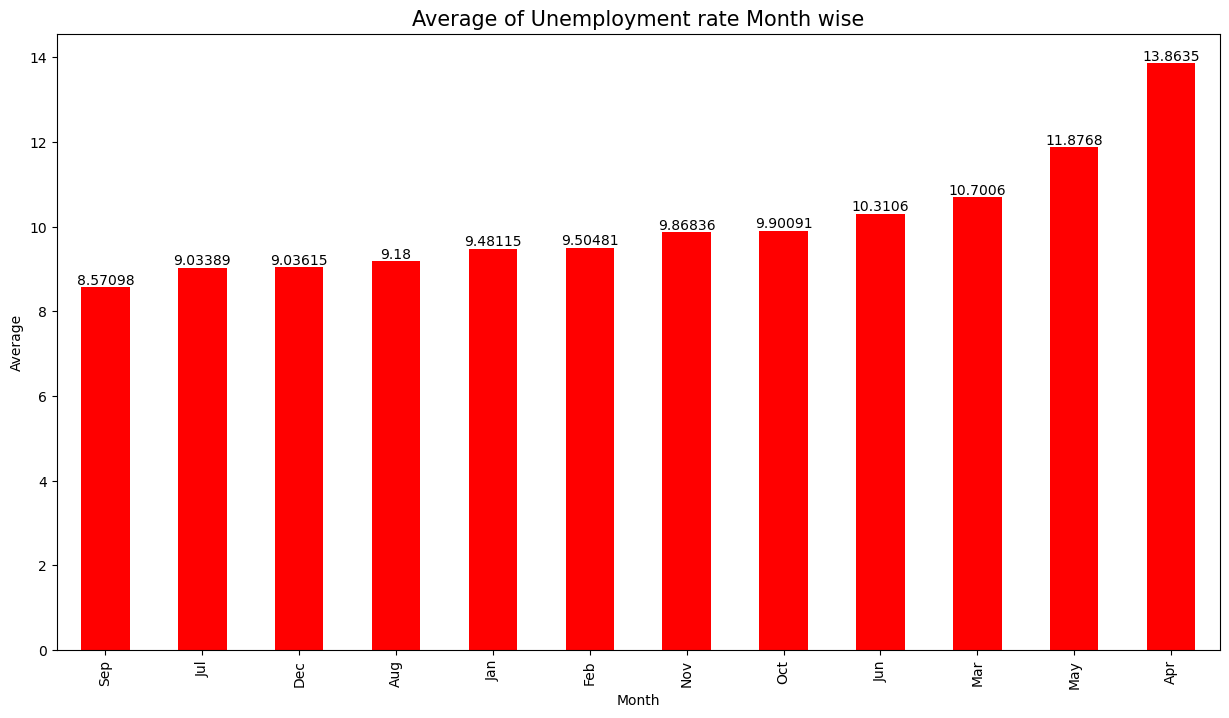

In [59]:
avg_month = data.groupby(['Month'])['Estimated Unemployment Rate (%)'].mean().sort_values(ascending = True)
plt.figure(figsize = (15,8))
ax = avg_month.plot(kind = 'bar', color = 'red')
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel('Average')
plt.title('Average of Unemployment rate Month wise', fontsize = 15)
plt.show()

**Year wise Average of Unemployment rate**

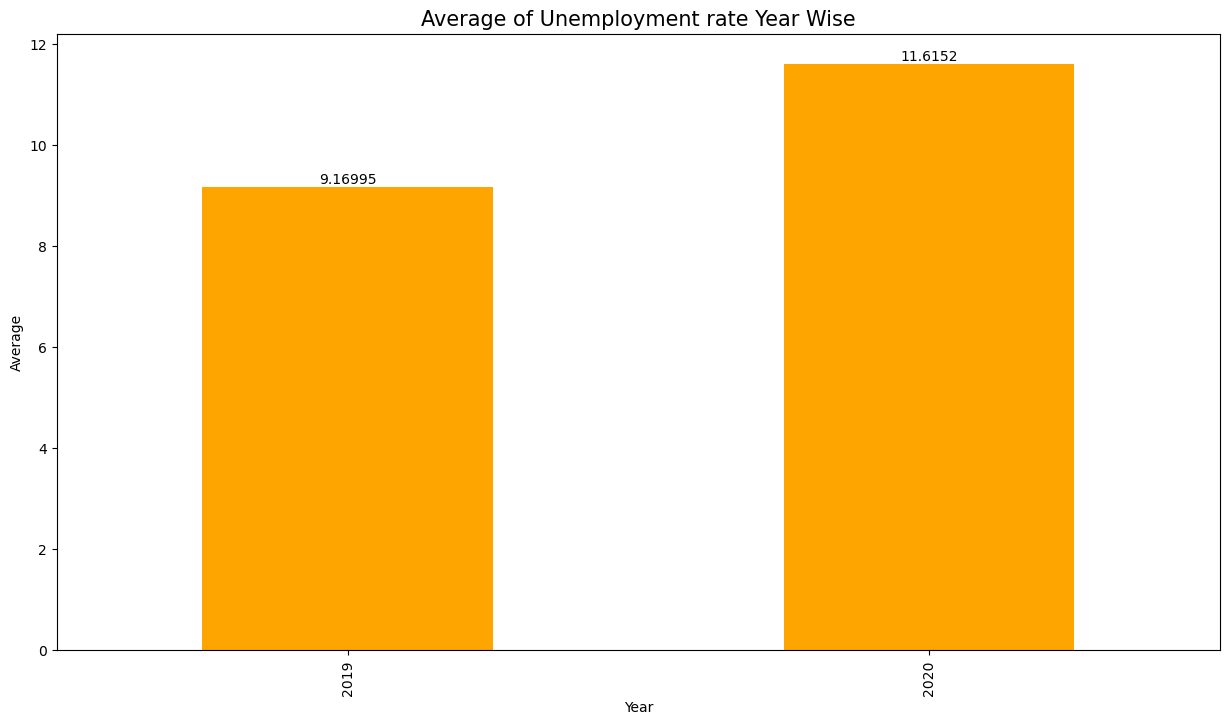

In [60]:
year_avg_unemp = data.groupby('Year')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize = (15,8))
ax = year_avg_unemp.plot(kind = 'bar', color = 'orange')
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel('Average')
plt.title('Average of Unemployment rate Year Wise', fontsize = 15)
plt.show()

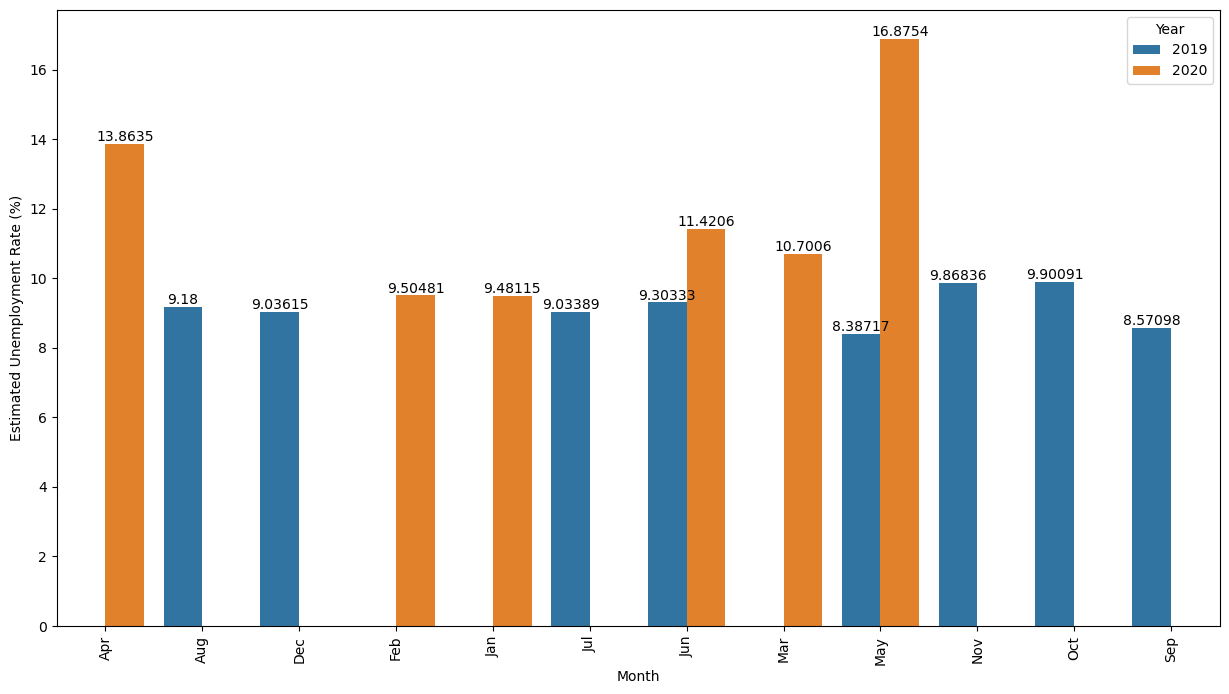

In [61]:
compare = data.groupby(['Month','Year'])['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Month', y='Estimated Unemployment Rate (%)', hue='Year', data=compare)
for cols in ax.containers:
    ax.bar_label(cols)
plt.xticks(rotation=90)
plt.show()

**Data Cleaning and Initial Exploration:**

The dataset was cleaned by removing duplicate records and rows with missing values.
The distribution of key variables, including Estimated Unemployment Rate, Estimated Employed, and Estimated Labour Participation Rate, was visualized through histograms.
The regional distribution of data and areas was also explored using count plots and pie charts.

**Outlier Detection and Removal:**

Outliers in the key variables were identified and removed using the Interquartile Range (IQR) method. This helped in cleaning the data and improving the robustness of the analysis.

**Relationships and Patterns:**

A scatter plot was used to visualize the relationship between Estimated Labour Participation Rate and Estimated Employed, revealing a positive correlation.
Pairplots and histograms were generated to explore relationships and distributions of variables.

**Regional and Area Analysis:**

Unemployment rates, employment levels, and labour participation rates were analyzed on a regional and area-specific basis.
Regional variations in unemployment rates and employment levels were observed, highlighting potential regional disparities.

**Temporal Analysis:**

A temporal analysis was conducted to examine how unemployment rates, employment levels, and labour participation rates changed over time.
Monthly and yearly averages were calculated and visualized to identify any temporal trends.

## Conclusions:

The analysis of unemployment data in India revealed variations in unemployment rates, employment levels, and labour force participation across regions and areas.
Positive correlations were observed between labour participation and employment, suggesting that higher labour force participation may lead to increased employment opportunities.
Temporal analysis indicated variations in unemployment rates over months and years, which may be influenced by seasonal factors or economic conditions.
Policymakers should consider addressing regional disparities and promoting policies that encourage labour force participation and job creation.
This analysis provides valuable insights into the unemployment situation in India, but further research and contextual information may be required to make informed policy recommendations and address the complex challenges associated with unemployment.